# Allie Shupe

# DSC 680: Applied Data Science

# Project 2 Code

## Data Preparation

In [2]:
# import the data
import pandas as pd
df = pd.read_csv('CMS_Inpatient_Claims.csv')

# show first few rows
df.head()

,IP_CLM_ID,BENE_SEX_IDENT_CD,BENE_AGE_CAT_CD,IP_CLM_BASE_DRG_CD,IP_CLM_ICD9_PRCDR_CD,IP_CLM_DAYS_CD,IP_DRG_QUINT_PMT_AVG,IP_DRG_QUINT_PMT_CD
0,IP-000022CE4125DBE7,2,4,3,31.0,4,86240,4
1,IP-0000417F50942D90,2,5,199,NaN,2,3447,2
2,IP-0000865F5457AC0E,1,1,119,54.0,4,34878,5
3,IP-00009789630AF474,2,2,128,NaN,2,3007,2
4,IP-0000C9D229B79D36,2,2,236,70.0,1,3352,2


In [3]:
# rename columns
df.rename(columns={'IP_CLM_ID': 'ClaimID', 'BENE_SEX_IDENT_CD': 'Gender', 'BENE_AGE_CAT_CD': 'Age_Category', 
                   'IP_CLM_BASE_DRG_CD': 'Diagnostic_Code', 'IP_CLM_ICD9_PRCDR_CD': 'Procedure_Code', 
                   'IP_CLM_DAYS_CD': 'LengthofStay_Code', 'IP_DRG_QUINT_PMT_AVG': 'ClaimAmount', 
                   'IP_DRG_QUINT_PMT_CD': 'ClaimAmount_Code'}, inplace=True)

In [4]:
df.head()

,ClaimID,Gender,Age_Category,Diagnostic_Code,Procedure_Code,LengthofStay_Code,ClaimAmount,ClaimAmount_Code
0,IP-000022CE4125DBE7,2,4,3,31.0,4,86240,4
1,IP-0000417F50942D90,2,5,199,NaN,2,3447,2
2,IP-0000865F5457AC0E,1,1,119,54.0,4,34878,5
3,IP-00009789630AF474,2,2,128,NaN,2,3007,2
4,IP-0000C9D229B79D36,2,2,236,70.0,1,3352,2


In [5]:
# Replace gender numbers with letters
r = {1: 'M', 2: 'F'}
df = df.replace({'Gender': r})

In [6]:
# drop id columns
df = df.drop(['ClaimID', 'ClaimAmount_Code'], axis=1)

In [7]:
# Show how many NA values are present by column
df.isna().sum()

Gender                    0
Age_Category              0
Diagnostic_Code           0
Procedure_Code       276546
LengthofStay_Code         0
ClaimAmount               0
dtype: int64

In [8]:
# change diagnostic code and procedure code to string variables
df['Diagnostic_Code']=df['Diagnostic_Code'].apply(str)
df['Procedure_Code']=df['Procedure_Code'].apply(str)

In [9]:
# show data types for all columns
df.dtypes

Gender               object
Age_Category          int64
Diagnostic_Code      object
Procedure_Code       object
LengthofStay_Code     int64
ClaimAmount           int64
dtype: object

## EDA

Text(0.5, 1.0, 'Histogram of Claim Amounts')

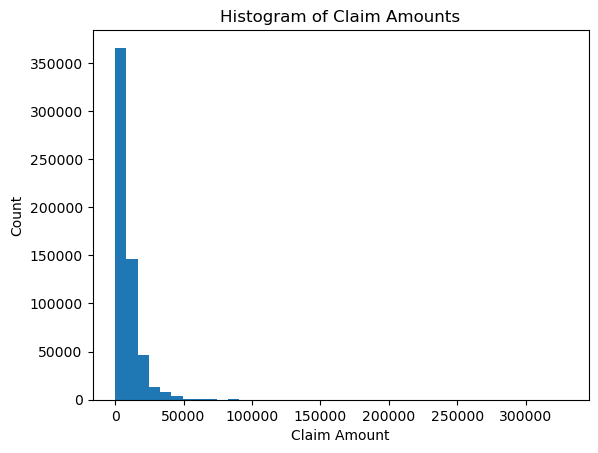

In [10]:
# import matplotlib and show histogram of claim amounts
import matplotlib.pyplot as plt

plt.hist(df['ClaimAmount'], bins=40)
plt.xlabel('Claim Amount')
plt.ylabel('Count')
plt.title('Histogram of Claim Amounts')

In [11]:
# show descriptive statistics for claim amount column
df['ClaimAmount'].describe()

count    588415.000000
mean       9312.621422
std       10482.707298
min           0.000000
25%        4008.000000
50%        6352.000000
75%       10760.000000
max      329467.000000
Name: ClaimAmount, dtype: float64

C:\Users\allie\AppData\Local\Temp\ipykernel_6408\3980965905.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = df.groupby('Gender').mean().sort_values('ClaimAmount').index


Text(0.5, 1.0, 'Average Claim Amount by Gender')

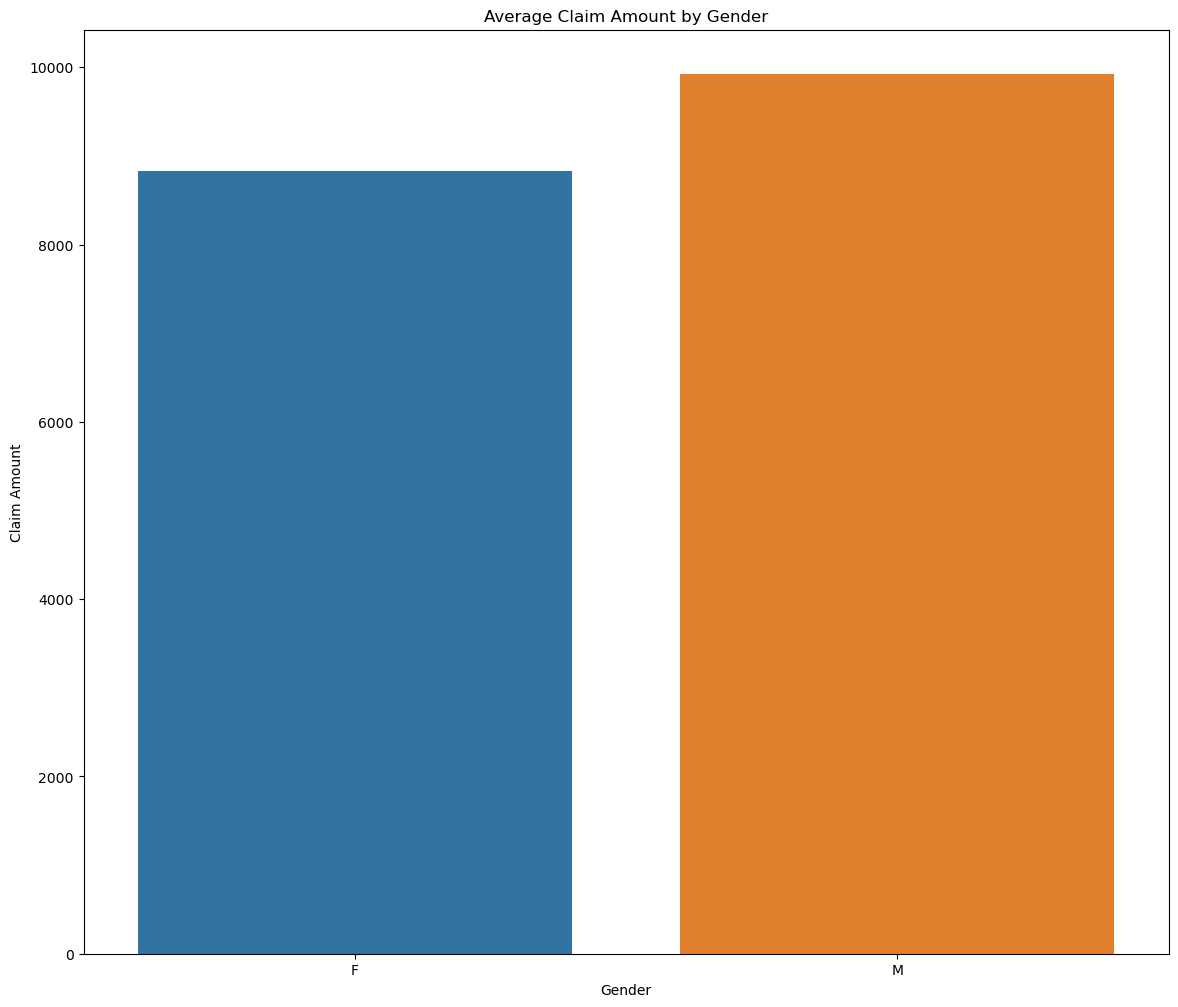

In [12]:
# Show bar plot of claim amount by gender
import seaborn as sns
fig = plt.figure(figsize=(14,12))
order = df.groupby('Gender').mean().sort_values('ClaimAmount').index
sns.barplot(
    x='Gender',
    y='ClaimAmount',
    data=df,
    order=order,
    errorbar=None,
)
plt.xlabel('Gender')
plt.ylabel('Claim Amount')
plt.title('Average Claim Amount by Gender')

([<matplotlib.axis.XTick at 0x1f70d82b9d0>,
 [Text(0, 0, 'under 65'),
  Text(1, 0, '65 - 69'),
  Text(2, 0, '70 - 74'),
  Text(3, 0, '75-79'),
  Text(4, 0, '80-84'),
  Text(5, 0, '85 and above')])

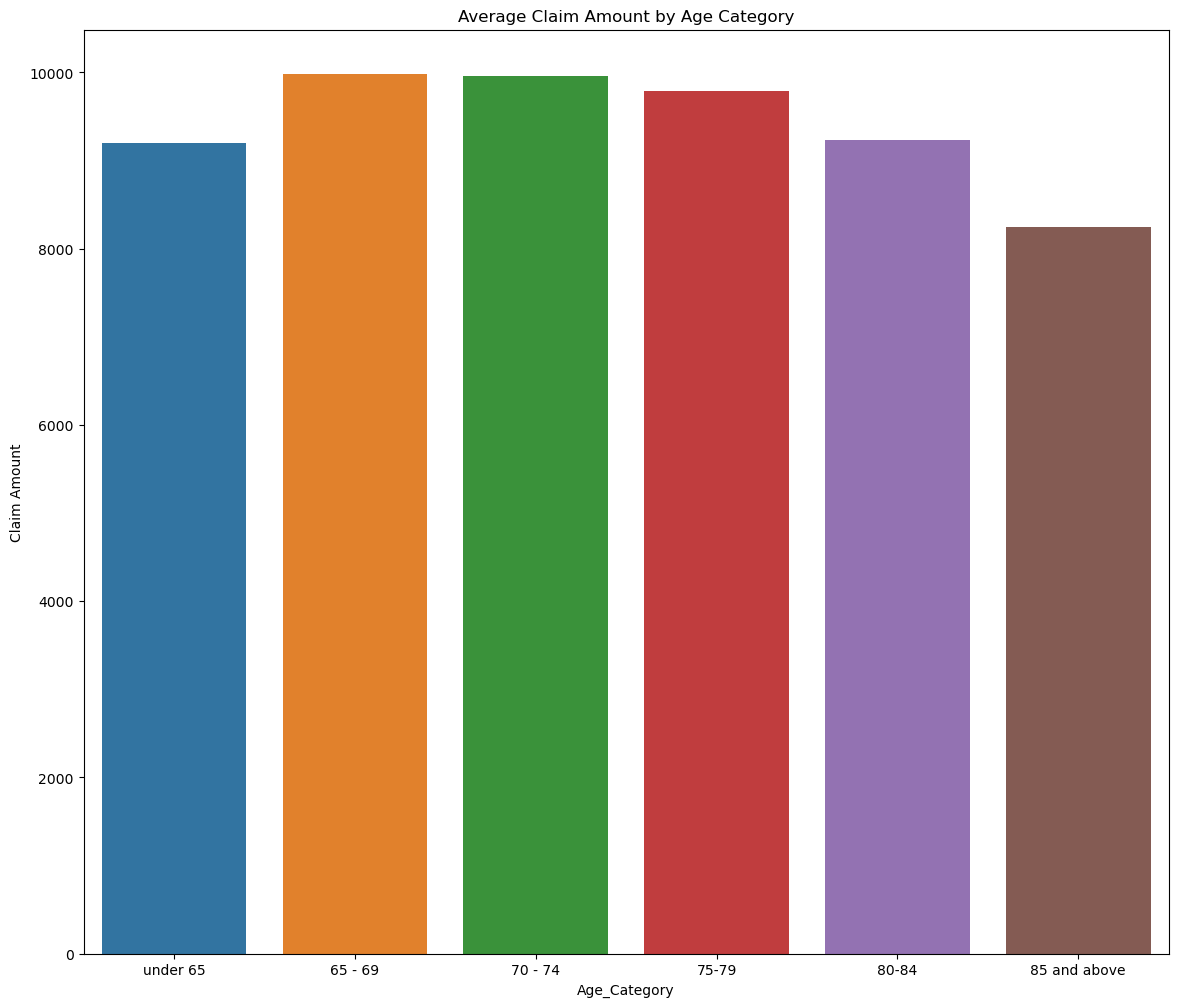

In [14]:
# Show bar plot of claim amount by Age Category
fig = plt.figure(figsize=(14,12))
sns.barplot(
    x='Age_Category',
    y='ClaimAmount',
    data=df,
    errorbar=None,
)
plt.xlabel('Age_Category')
plt.ylabel('Claim Amount')
plt.title('Average Claim Amount by Age Category')
plt.xticks([0, 1, 2, 3, 4, 5],['under 65', '65 - 69', '70 - 74', '75-79', '80-84', '85 and above'])

([<matplotlib.axis.XTick at 0x1f70dd335d0>,
 [Text(0, 0, '1 day'),
  Text(1, 0, '2-4 days'),
  Text(2, 0, '5-7 days'),
  Text(3, 0, '8 or more days')])

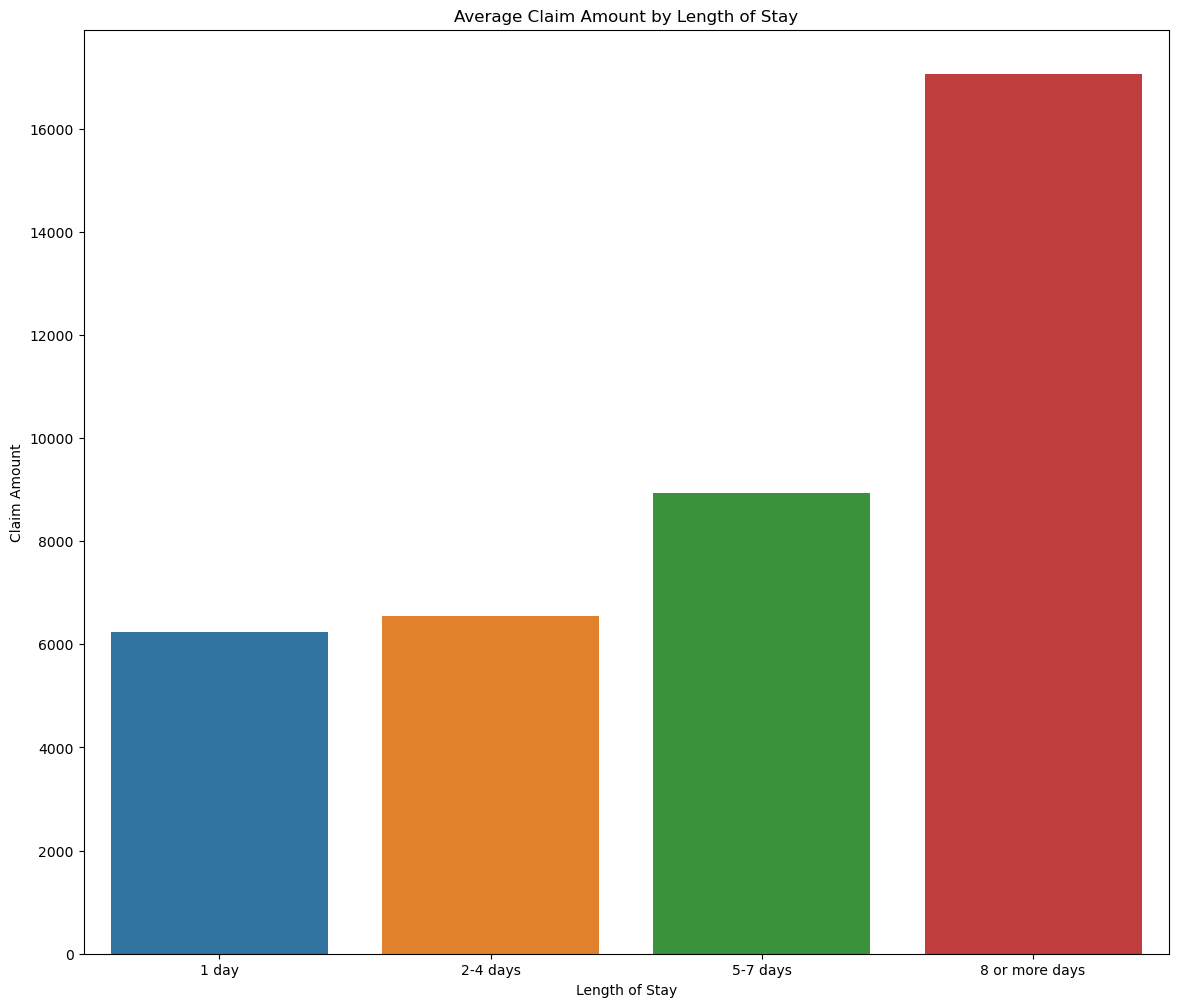

In [15]:
# Show bar plot of claim amount by length of stay
fig = plt.figure(figsize=(14,12))
sns.barplot(
    x='LengthofStay_Code',
    y='ClaimAmount',
    data=df,
    errorbar=None,
)
plt.xlabel('Length of Stay')
plt.ylabel('Claim Amount')
plt.title('Average Claim Amount by Length of Stay')
plt.xticks([0, 1, 2, 3],['1 day', '2-4 days', '5-7 days', '8 or more days'])

In [16]:
# Show diagnostic codes with the highest average claim amounts
df.groupby('Diagnostic_Code').ClaimAmount.mean().sort_values(ascending=False)[:5]

Diagnostic_Code
294    226550.000000
1      180699.490566
2      123514.596065
5       92625.117647
4       88456.000000
Name: ClaimAmount, dtype: float64

In [17]:
# Show the number of claims by gender
df['Gender'].value_counts()

F    330198
M    258217
Name: Gender, dtype: int64

In [24]:
# compare blank procedure codes to non-blanks
blank_df = df[df['Procedure_Code'] == 'nan']
nonblank_df = df[df['Procedure_Code'] != 'nan']
blank_avg = blank_df['ClaimAmount'].mean()
nonblank_avg = nonblank_df['ClaimAmount'].mean()

print('Average of claims with a procedure code:', nonblank_avg)
print('Average of claims without a procedure code:', blank_avg)

Average of claims with a procedure code: 12369.223010302403
Average of claims without a procedure code: 5865.60255075105


In [25]:
# evaluate excluding outliers
excl_df = df[df['ClaimAmount'] <= 100000]
df_avg = df['ClaimAmount'].mean()
excl_avg = excl_df['ClaimAmount'].mean()

print('Average of claims (full data set):', df_avg)
print('Average of claims excluding outliers:', excl_avg)

Average of claims (full data set): 9312.621421955593
Average of claims excluding outliers: 9118.194918614447


In [29]:
# find the number of claims over $100,000
over_df = df[df['ClaimAmount'] > 100000]

print('Number of claims over $100,000:', over_df.shape[0])
print('Number of claims under or equal to $100,000:', excl_df.shape[0])

Number of claims over $100,000: 780
Number of claims under or equal to $100,000: 587635


## Modeling

In [121]:
# create dummy variables for all categorical variables
df = pd.get_dummies(df)

df.head()

,Age_Category,LengthofStay_Code,ClaimAmount,Gender_F,Gender_M,Diagnostic_Code_1,Diagnostic_Code_10,Diagnostic_Code_100,Diagnostic_Code_101,Diagnostic_Code_102,...,Procedure_Code_88.0,Procedure_Code_89.0,Procedure_Code_92.0,Procedure_Code_93.0,Procedure_Code_94.0,Procedure_Code_96.0,Procedure_Code_97.0,Procedure_Code_98.0,Procedure_Code_99.0,Procedure_Code_nan
0,4,4,86240,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,2,3447,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,4,34878,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,3007,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,1,3352,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
# split into features and target dataframes
features_df = df.loc[:, df.columns != 'ClaimAmount']
target_df = df['ClaimAmount']

# split into training and testing data
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features_df, target_df, 
                                                                            test_size = 0.2, random_state = 1)

In [123]:
# Fit a Random Forest Regression model to the data
from sklearn.ensemble import RandomForestRegressor
rf_model2 = RandomForestRegressor()
rf_model2.fit(features_train, target_train)
rf_pred2 = rf_model2.predict(features_test)

In [127]:
# print the r2 value
from sklearn.metrics import r2_score
r2_score(target_test, rf_pred2)

0.7126876752448613

In [128]:
# Print the RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(target_test, rf_pred2, squared=False)

5561.464386124138

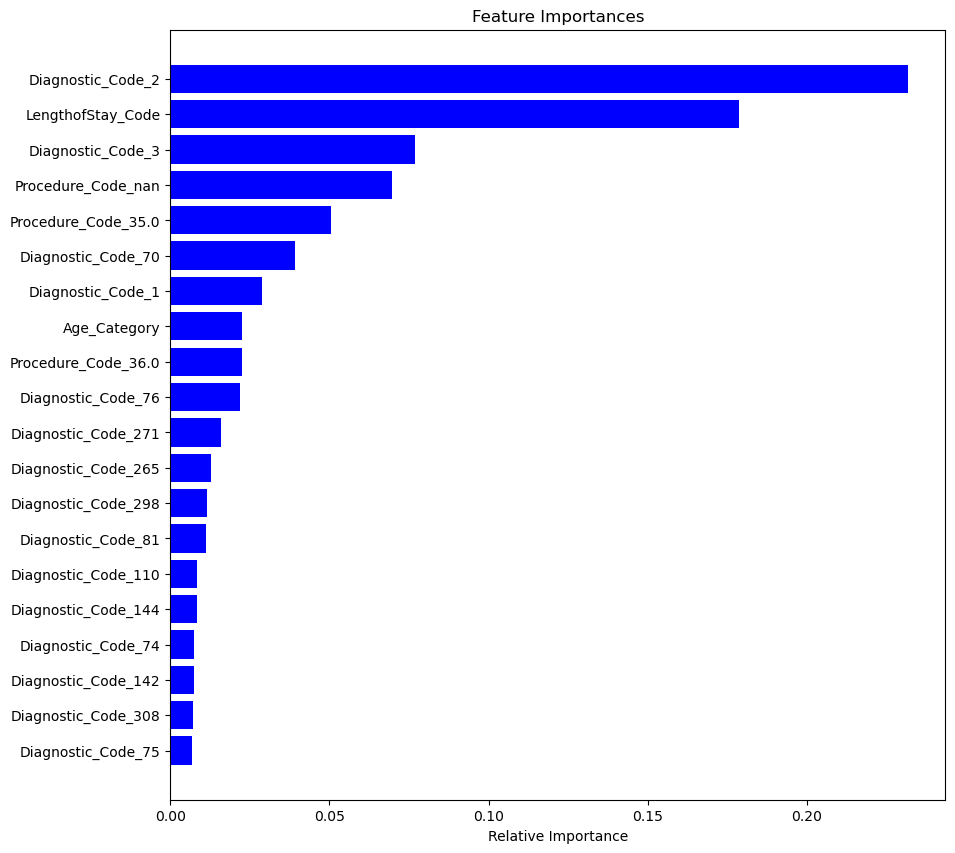

In [136]:
# visualize feature importance
import numpy as np
features = features_train.columns
importances = rf_model2.feature_importances_
indices = np.argsort(importances)

# set number of features shown
num_features = 20 

plt.figure(figsize=(10,10))
plt.title('Feature Importances')

# create plot
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

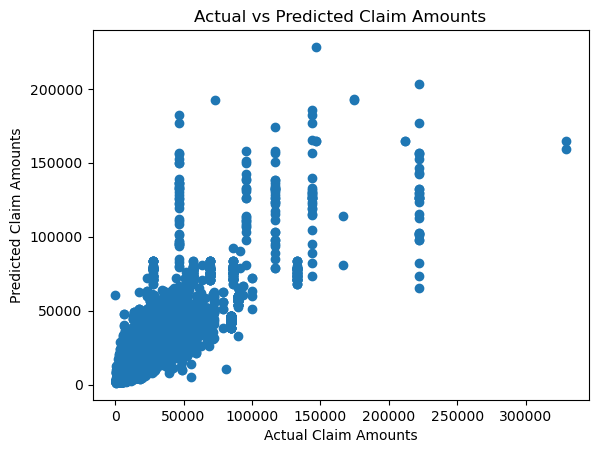

In [138]:
# predicted vs actual plot
plt.scatter(target_test, rf_pred2)
plt.xlabel('Actual Claim Amounts')
plt.ylabel('Predicted Claim Amounts')
plt.title('Actual vs Predicted Claim Amounts')
plt.show()

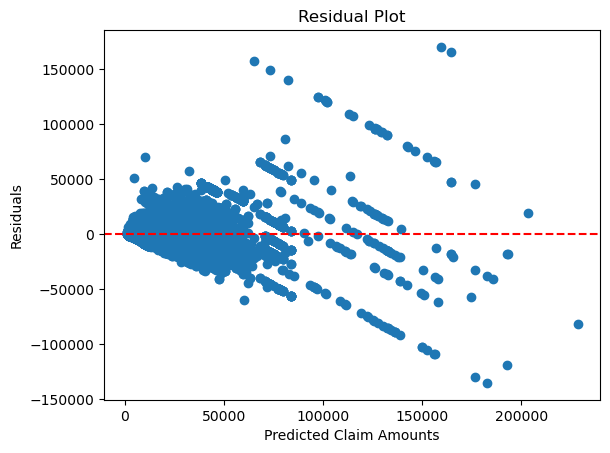

In [139]:
# plot residuals
residuals = target_test - rf_pred2
plt.scatter(rf_pred2, residuals)
plt.xlabel('Predicted Claim Amounts')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()